In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
df = pd.read_csv('/kaggle/input/btcinusd/BTC-2018min.csv')

In [103]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1546300740,2018-12-31 23:59:00,BTC/USD,3689.26,3693.30,3689.26,3693.30,9.838855,36337.841473
1,1546300680,2018-12-31 23:58:00,BTC/USD,3689.26,3691.35,3689.26,3691.35,0.560000,2067.156000
2,1546300620,2018-12-31 23:57:00,BTC/USD,3688.83,3689.26,3688.83,3689.26,0.560833,2069.059602
3,1546300560,2018-12-31 23:56:00,BTC/USD,3687.87,3689.65,3686.92,3686.92,7.610240,28058.346208
4,1546300500,2018-12-31 23:55:00,BTC/USD,3688.28,3688.85,3685.00,3688.85,7.665703,28277.629729


In [104]:
len(df)

525599

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525599 entries, 0 to 525598
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        525599 non-null  int64  
 1   date        525599 non-null  object 
 2   symbol      525599 non-null  object 
 3   open        525599 non-null  float64
 4   high        525599 non-null  float64
 5   low         525599 non-null  float64
 6   close       525599 non-null  float64
 7   Volume BTC  525599 non-null  float64
 8   Volume USD  525599 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.1+ MB


In [106]:
df['date']=pd.to_datetime(df['date'])

In [107]:
tem_df = df[['date','close']]
tem_df.head()

,date,close
0,2018-12-31 23:59:00,3693.30
1,2018-12-31 23:58:00,3691.35
2,2018-12-31 23:57:00,3689.26
3,2018-12-31 23:56:00,3686.92
4,2018-12-31 23:55:00,3688.85


In [108]:
def convert_to_k_format(column):
    return column / 1000

In [109]:
tem_df['close(K)'] = convert_to_k_format(tem_df['close'])

/tmp/ipykernel_34/26577436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem_df['close(K)'] = convert_to_k_format(tem_df['close'])


In [110]:
tem_df

,date,close,close(K)
0,2018-12-31 23:59:00,3693.30,3.69330
1,2018-12-31 23:58:00,3691.35,3.69135
2,2018-12-31 23:57:00,3689.26,3.68926
3,2018-12-31 23:56:00,3686.92,3.68692
4,2018-12-31 23:55:00,3688.85,3.68885
...,...,...,...
525594,2018-01-01 00:05:00,13737.93,13.73793
525595,2018-01-01 00:04:00,13803.20,13.80320
525596,2018-01-01 00:03:00,13823.19,13.82319
525597,2018-01-01 00:02:00,13847.51,13.84751


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


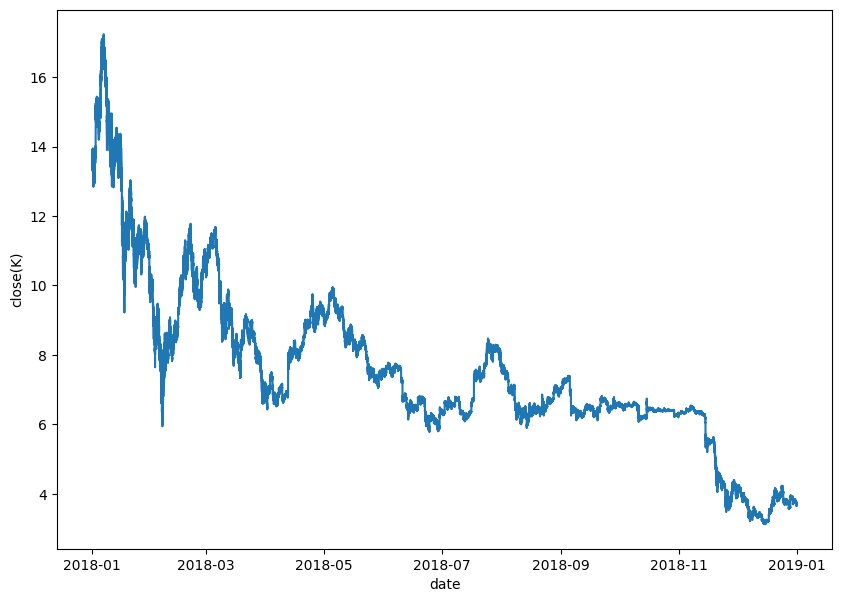

In [112]:
plt.figure(figsize=(10,7))
sns.lineplot(data = tem_df, x = 'date', y = 'close(K)');

In [113]:
def create_feature_target_dataframe(df, column, window_size=5):
    values = df[column].values
    
    # Initialize lists to store the feature rows and targets
    features = []
    targets = []
    columns = []

    # Loop through the values, taking 5 values as features and the 6th as the target
    for i in range(len(values) - window_size):
        feature_row = values[i:i+window_size]
        target = values[i+window_size]
        
        # Append the feature row and target to the respective lists
        features.append(feature_row)
        targets.append(target)

    for i in range(window_size):
        col = f"x{i+1}"
        columns.append(col)
        
    # Create a new DataFrame from the feature rows and targets
    new_df = pd.DataFrame(features, columns=columns)
    new_df['target'] = targets
    
    return new_df

In [114]:
prep_df = create_feature_target_dataframe(tem_df, column='close(K)', window_size=2)
prep_df.head()

,x1,x2,target
0,3.69330,3.69135,3.68926
1,3.69135,3.68926,3.68692
2,3.68926,3.68692,3.68885
3,3.68692,3.68885,3.68485
4,3.68885,3.68485,3.68485


In [115]:
from sklearn.model_selection import train_test_split

In [159]:
x = prep_df.drop('target',axis=1)
y = prep_df['target']

In [160]:
x.shape, y.shape

((525597, 2), (525597,))

In [161]:
x

,x1,x2
0,3.69330,3.69135
1,3.69135,3.68926
2,3.68926,3.68692
3,3.68692,3.68885
4,3.68885,3.68485
...,...,...
525592,13.68890,13.70020
525593,13.70020,13.73793
525594,13.73793,13.80320
525595,13.80320,13.82319


In [157]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scl = MinMaxScaler(
    feature_range=(0,1)
)
x = std_scl.fit_transform(x)
x[0:10]

array([[0.04031386, 0.04017567],
       [0.04017567, 0.04002755],
       [0.04002755, 0.03986172],
       [0.03986172, 0.0399985 ],
       [0.0399985 , 0.03971502],
       [0.03971502, 0.03971502],
       [0.03971502, 0.03971502],
       [0.03971502, 0.03942871],
       [0.03942871, 0.03942871],
       [0.03942871, 0.03988156]])

In [158]:
std_scl.transform(np.array([[3.233,3.432]]))

array([[3.233, 3.432]])

In [128]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y, 
    test_size=0.10,
    shuffle=False
)

In [129]:
x_train.shape,x_test.shape

((473037, 2), (52560, 2))

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [131]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [132]:
# Reshape the data for LSTM [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [133]:
x_train

array([[[0.04031386, 0.04017567]],

       [[0.04017567, 0.04002755]],

       [[0.04002755, 0.03986172]],

       ...,

       [[0.24269464, 0.23993075]],

       [[0.23993075, 0.23788334]],

       [[0.23788334, 0.23568002]]])

In [134]:
# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='tanh')))
model.add(Dense(1,activation='linear'))

# Define the optimizer with a specific learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Display the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [135]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=8, batch_size=64,
                    validation_data=(x_test, y_test), 
                    shuffle=False)

Epoch 1/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - loss: 2.4503 - val_loss: 2.0198
Epoch 2/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 0.0020 - val_loss: 1.6065
Epoch 3/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 0.0013 - val_loss: 1.3289
Epoch 4/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 8.0177e-04 - val_loss: 1.1476
Epoch 5/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 5.2516e-04 - val_loss: 1.0412
Epoch 6/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 3.7262e-04 - val_loss: 0.9857
Epoch 7/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 2.9272e-04 - val_loss: 0.9548
Epoch 8/8
7392/7392 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 2.4614e-04 - val_loss: 0.9355


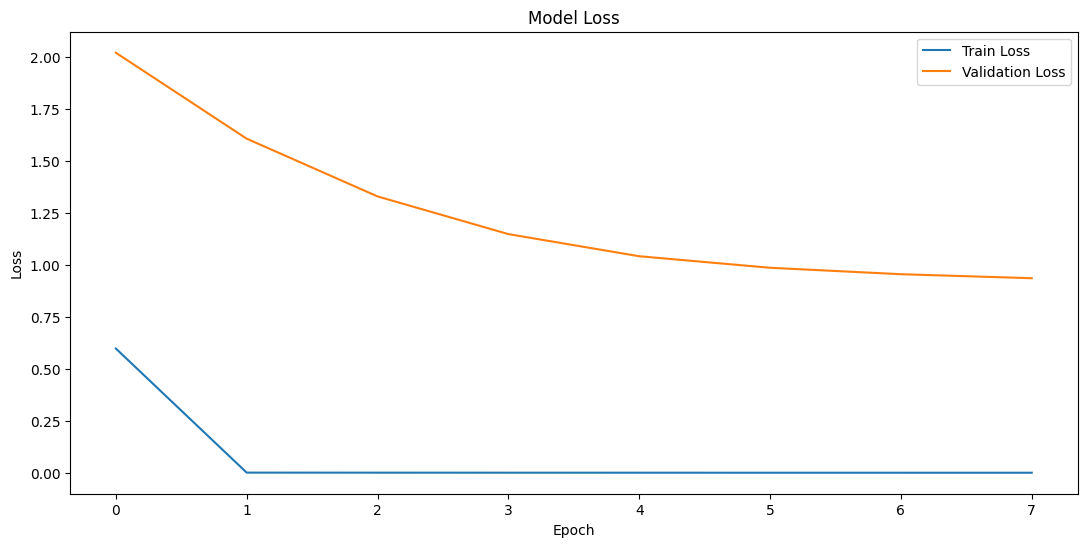

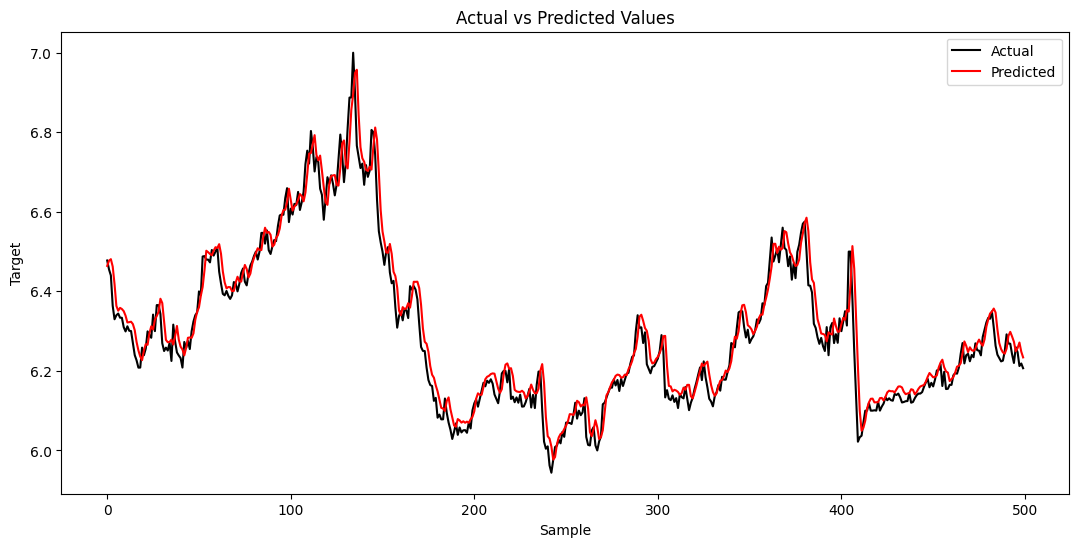

In [136]:
plt.figure(figsize=(13,6))


y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(13,6))
# Plot the actual vs predicted values
plt.plot(y_test[0:500], label='Actual', color='black')
plt.plot(y_pred[0:500], label='Predicted',color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.show()

array([[0., 0., 0., 0.]])

In [86]:
list(last_entry.reshape(1,-1)[0, -1:])

[6.47504997253418]

In [87]:
list(last_entry)

[array([0.23568002, 6.47504997])]

In [96]:
last_entry = last_entry.reshape((last_entry.shape[0], 1, last_entry.shape[1]))

In [100]:
model.predict(last_entry, verbose=0)[0][0]  # Assuming model.predict returns a 2D array

16.2193

In [152]:
last_entry = x_train[-1:]
forecasts_dict = {}

num_forecasts = 10
forecast_list = []
window_size = 2

# Generate forecasts
for _ in range(num_forecasts):
    # Predict the next value
    predicted_value = model.predict(last_entry, verbose=0)[0][0]  # Assuming model.predict returns a 2D array
    
    # Reshape last_entry to ensure it is a 2D array with a single sample
    last_entry = last_entry.reshape(1, -1)
    
    # Create the new window with the last (window_size-1) values and the predicted value
    window_values = list(last_entry[0, -(window_size-1):])
    window_values.append(predicted_value)
    print(window_values)
    last_entry = np.array([window_values])
    last_entry = last_entry.reshape((last_entry.shape[0], 1, last_entry.shape[1]))
    # Store the forecasted value
    forecast_list.append(predicted_value)

[0.23568002052367987, 6.480295]
[6.480295181274414, 17.988045]
[17.98804473876953, 18.052046]
[18.052045822143555, 18.052073]
[18.052072525024414, 18.052073]
[18.052072525024414, 18.052073]
[18.052072525024414, 18.052073]
[18.052072525024414, 18.052073]
[18.052072525024414, 18.052073]
[18.052072525024414, 18.052073]


In [151]:
forecast_list

[6.480295,
 17.988045,
 18.052046,
 18.052073,
 18.052073,
 18.052073,
 18.052073,
 18.052073,
 18.052073,
 18.052073]